In [1]:
library(tidyverse)
library(quanteda)

install.packages('quanteda.textplots')
require(quanteda.textplots)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Package version: 3.2.4
Unicode version: 13.0
ICU version: 66.1

Parallel computing: 4 of 4 threads used.

See https://quanteda.io for tutorials and examples.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: quanteda.textplots



In [2]:
data <- read_csv("/tweet_main_2010_2022.csv", 
                 col_select = c("TweetID", "Tweet", "UniSerial"))

Rows: 5245349 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Tweet
dbl (2): TweetID, UniSerial

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
data$Rank100 <- 100
data <- data[order(data$UniSerial), ]

In [4]:
head(data)

TweetID,Tweet,UniSerial,Rank100
<dbl>,<chr>,<dbl>,<dbl>
1.609334e+18,"The archway in Lockhart Hall was named Ikeda Arch for Kentaro Ikeda, a member of the Class of 1944 and the University’s sole Japanese student during World War II. https://t.co/ir2MwM64rJ",1,100
1.609317e+18,"This fall, @PUWRFC played its first season as a varsity squad. 🐅 https://t.co/OmsADjVZBC",1,100
1.609312e+18,"Professor @KeithWailoo documented the history of menthol cigarettes and racial marketing in “Pushing Cool: Big Tobacco, Racial Marketing and the Untold Story of the Menthol Cigarette.""",1,100
1.609306e+18,"#PrincetonU revealed portraits of Senator Bill Bradley '65 (https://t.co/5I7M4DXIHQ), renowned cell biologist Elaine Fuchs *77 and longtime administrator and academic trailblazer Ruth Simmons (https://t.co/OQlzs58uQm). https://t.co/ZXBvatntgg",1,100
1.609295e+18,"We announced an enhancement to our groundbreaking financial aid program, providing even more generous support to undergraduates and their families as #PrincetonU works to attract talented students from all backgrounds. https://t.co/4HzXE2PjF2",1,100
1.609277e+18,"We officially welcomed the Great Class of 2026 to campus with Opening Exercises, the Pre-rade and the Pre-read Assembly. https://t.co/lJOFyQxBA9",1,100


In [5]:
tail(data)

TweetID,Tweet,UniSerial,Rank100
<dbl>,<chr>,<dbl>,<dbl>
8202565750,JCU's London Fletcher named a finalist for the NFL's Man of the Year Award for service to the community: http://bit.ly/75SkRv,500,100
8077488273,Everybody knows a high school senior. Have you encouraged them to apply to JCU? www.jcu.edu/apply,500,100
7997472613,JCU grad Mike Henry is on the ground in Haiti with Cross International. Visit Mike’s blog for a first-hand account. tinyurl.com/y8o3qlb,500,100
7760867707,Check out these great photos taken by students during study abroad http://www.jcu.edu/events/studyabroadphotos.htm,500,100
7670616202,JCU Men's Lacrosse ready to start second season in MCLA with high expectations.: http://bit.ly/6MLeXz,500,100
7519697350,JCU grad named Company Officer and Vice President at Lincoln Electric Company: http://bit.ly/4IdDJY,500,100


In [6]:
dim(data)

[1] 5245349       4

In [7]:
data$Rank100[data$UniSerial <= 100 ] <- 1
data$Rank100[(data$UniSerial > 100) & (data$UniSerial <= 200)] <- 2
data$Rank100[(data$UniSerial > 200) & (data$UniSerial <= 300)] <- 3
data$Rank100[(data$UniSerial > 300) & (data$UniSerial <= 400)] <- 4
data$Rank100[(data$UniSerial > 400) & (data$UniSerial <= 500)] <- 5

In [8]:
unique(data$Rank100)

[1] 1 2 3 4 5

In [9]:
toks <- tokens(data$Tweet, 
               remove_punct = TRUE, 
               remove_numbers=TRUE, 
               remove_symbols=TRUE, 
               #remove_twitter=TRUE, 
               remove_url=TRUE)

dfmat <- dfm(toks)
dfmat <- dfm_remove(dfmat, pattern = c(stopwords("en"), "http", "https", "t", "co", "bit", "ly", "thank", "thanks", "you", "amp", "campus", "RT", "pm", "p.m", "am", "a.m",
                                      "prof", "prof.", "professor", "saturday", "sunday", "monday", "tuesday", "wednesday", "thursday", "friday", "w", "w/o", "w/", "mt", "congrats", "congratulations",
                                      "hello", "bye", "welcome", "see", "check", "tomorrow", "today", "tonight", "yesterday", "class", "classes", "break", "vacation", "wish", "wishing", 
                                      "christmas", "xmas", "day", "night", "year", "month", "season", "summar", "winter", "spring", "fall", "session", "sessions", "term",
                                      "student", "students", "can", "cannot", "can't", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "zero", "ones", "zeros",
                                      "us", "they", "them", "their", "these", "those", "dr", "s", "university", "school", "college", "colleges"))
dfmat <- dfm_trim(dfmat, min_termfreq = 100)

topfeatures(dfmat)

new  great   week    now    get  first   help  learn   time   join 
297885 155909 140240 139062 138027 128779 124027 121787 120926 118463

In [10]:
nfeat(dfmat)

[1] 30646

In [11]:
fcmat <- fcm(dfmat)
dim(fcmat)

[1] 30646 30646

In [12]:
topfeatures(fcmat)

get      free   weekend     state president    center      open      sure 
   469835    433700    392844    340354    314465    308880    304468    301605 
   online      look 
   295141    293889

In [13]:
feat <- names(topfeatures(fcmat, 100))
fcmat_select <- fcm_select(fcmat, pattern = feat, selection = "keep")
dim(fcmat_select)

[1] 100 100

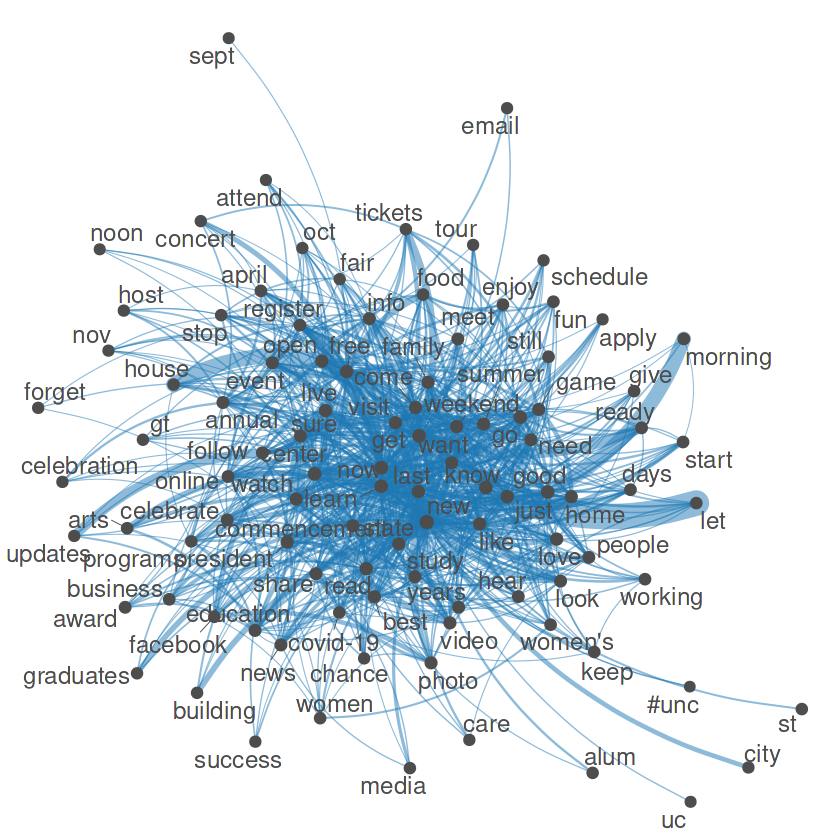

In [14]:
size <- log(colSums(dfm_select(dfmat, feat, selection = "keep")))

set.seed(144)
textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

In [15]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,20432959,1091.3,55534089,2965.9,67953774,3629.2
Vcells,355444277,2711.9,943020544,7194.7,934108510,7126.7


In [16]:
fcm_plot <- textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

# save our plot
ggsave("/twitter_main_fcm_total.png", 
       plot = fcm_plot, 
       height=10, 
       width=10, 
       units="in") 

In [17]:
hundred_1 <- data[data$Rank100 == 1, ]
hundred_2 <- data[data$Rank100 == 2, ]
hundred_3 <- data[data$Rank100 == 3, ]
hundred_4 <- data[data$Rank100 == 4, ]
hundred_5 <- data[data$Rank100 == 5, ]

[1] "Top features:"
     new research     help      now    great    first      via     week 
  106881    48782    39777    39541    39195    38183    37675    37176 
     get     time 
   36286    34289 
[1] ""
[1] "No. of features:"


[1] 14123

[1] ""
[1] "Dimension of FCM:"


[1] 14123 14123

[1] ""


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11950206,638.3,44427272,2372.7,67953774,3629.2
Vcells,227697673,1737.2,754416436,5755.8,935535493,7137.6


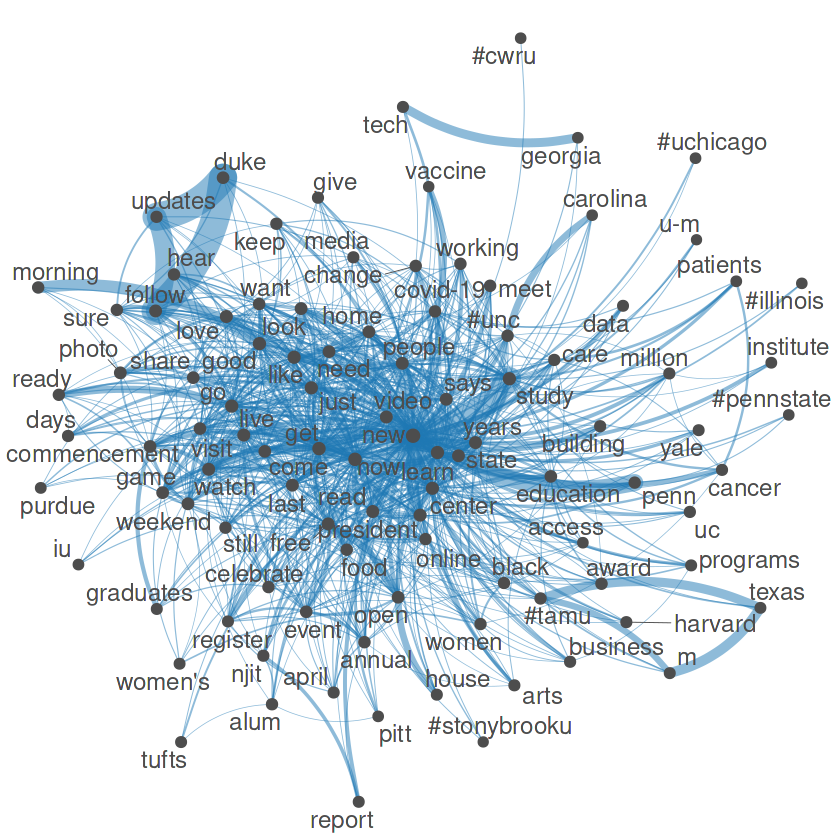

In [18]:
# for rank 1-100

toks <- tokens(hundred_1$Tweet, 
               remove_punct = TRUE, 
               remove_numbers=TRUE, 
               remove_symbols=TRUE, 
               #remove_twitter=TRUE, 
               remove_url=TRUE)

dfmat <- dfm(toks)
dfmat <- dfm_remove(dfmat, pattern = c(stopwords("en"), "http", "https", "t", "co", "bit", "ly", "thank", "thanks", "you", "amp", "campus", "RT", "pm", "p.m", "am", "a.m",
                                      "prof", "prof.", "professor", "saturday", "sunday", "monday", "tuesday", "wednesday", "thursday", "friday", "w", "w/o", "w/", "mt", "congrats", "congratulations",
                                      "hello", "bye", "welcome", "see", "check", "tomorrow", "today", "tonight", "yesterday", "class", "classes", "break", "vacation", "wish", "wishing", 
                                      "christmas", "xmas", "day", "night", "year", "month", "season", "summar", "winter", "spring", "fall", "session", "sessions", "term",
                                      "student", "students", "can", "cannot", "can't", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "zero", "ones", "zeros",
                                      "us", "they", "them", "their", "these", "those", "dr", "s", "university", "school", "college", "colleges"))
dfmat <- dfm_trim(dfmat, min_termfreq = 100)

print("Top features:")
print(topfeatures(dfmat))
print("")

print("No. of features:")
nfeat(dfmat)
print("")

fcmat <- fcm(dfmat)
print("Dimension of FCM:")
dim(fcmat)
print("")

feat <- names(topfeatures(fcmat, 100))
fcmat_select <- fcm_select(fcmat, pattern = feat, selection = "keep")

size <- log(colSums(dfm_select(dfmat, feat, selection = "keep")))
set.seed(144)
textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

fcm_plot <- textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

# save our plot
ggsave("/twitter_main_fcm_Hundred_1.png", 
       plot = fcm_plot, 
       height=10, 
       width=10, 
       units="in") 

gc()

[1] "Top features:"
   new  great    get   week    now   help  learn center  first   join 
 70176  40764  37890  37574  36055  33916  33134  32269  31484  30801 
[1] ""
[1] "No. of features:"


[1] 11666

[1] ""
[1] "Dimension of FCM:"


[1] 11666 11666

[1] ""


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11373720,607.5,35541818,1898.2,67953774,3629.2
Vcells,213701714,1630.5,603533149,4604.6,935535493,7137.6


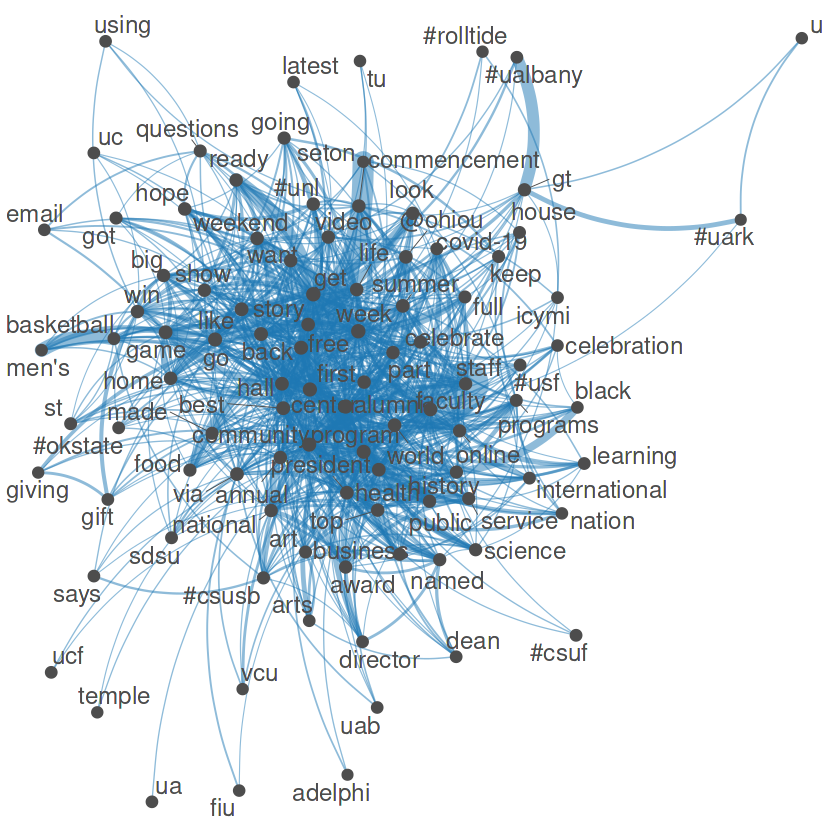

In [19]:
# for rank 101-200

toks <- tokens(hundred_2$Tweet, 
               remove_punct = TRUE, 
               remove_numbers=TRUE, 
               remove_symbols=TRUE, 
               #remove_twitter=TRUE, 
               remove_url=TRUE)

dfmat <- dfm(toks)
dfmat <- dfm_remove(dfmat, pattern = c(stopwords("en"), "http", "https", "t", "co", "bit", "ly", "thank", "thanks", "you", "amp", "campus", "RT", "pm", "p.m", "am", "a.m",
                                      "prof", "prof.", "professor", "saturday", "sunday", "monday", "tuesday", "wednesday", "thursday", "friday", "w", "w/o", "w/", "mt", "congrats", "congratulations",
                                      "hello", "bye", "welcome", "see", "check", "tomorrow", "today", "tonight", "yesterday", "class", "classes", "break", "vacation", "wish", "wishing", 
                                      "christmas", "xmas", "day", "night", "year", "month", "season", "summar", "winter", "spring", "fall", "session", "sessions", "term",
                                      "student", "students", "can", "cannot", "can't", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "zero", "ones", "zeros",
                                      "us", "they", "them", "their", "these", "those", "dr", "s", "university", "school", "college", "colleges"))
dfmat <- dfm_trim(dfmat, min_termfreq = 100)

print("Top features:")
print(topfeatures(dfmat))
print("")

print("No. of features:")
nfeat(dfmat)
print("")

fcmat <- fcm(dfmat)
print("Dimension of FCM:")
dim(fcmat)
print("")

feat <- names(topfeatures(fcmat, 100))
fcmat_select <- fcm_select(fcmat, pattern = feat, selection = "keep")

size <- log(colSums(dfm_select(dfmat, feat, selection = "keep")))
set.seed(144)
textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

fcm_plot <- textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

# save our plot
ggsave("/twitter_main_fcm_Hundred_2.png", 
       plot = fcm_plot, 
       height=10, 
       width=10, 
       units="in") 

gc()

[1] "Top features:"
   new    get  great   week    now  learn   help   join center  state 
 50764  32274  31982  28963  28441  28029  27722  26889  25291  24775 
[1] ""
[1] "No. of features:"


[1] 9352

[1] ""
[1] "Dimension of FCM:"


[1] 9352 9352

[1] ""


Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,10453681,558.3,28433455,1518.6,67953774,3629.2
Vcells,199272204,1520.4,603533149,4604.6,935535493,7137.6


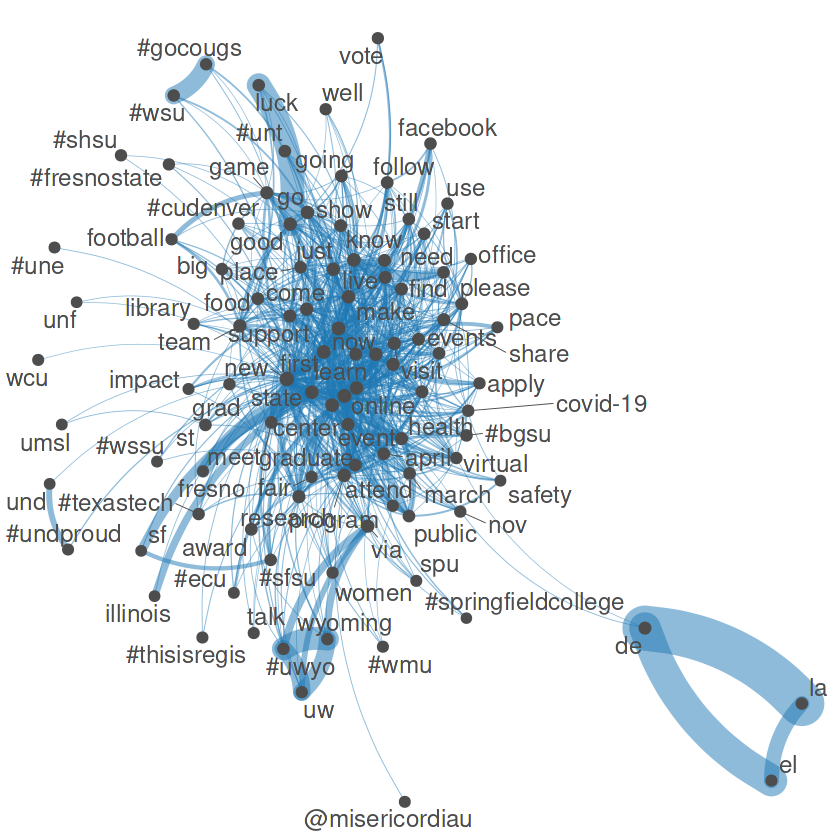

In [20]:
# for rank 201-300

toks <- tokens(hundred_3$Tweet, 
               remove_punct = TRUE, 
               remove_numbers=TRUE, 
               remove_symbols=TRUE, 
               #remove_twitter=TRUE, 
               remove_url=TRUE)

dfmat <- dfm(toks)
dfmat <- dfm_remove(dfmat, pattern = c(stopwords("en"), "http", "https", "t", "co", "bit", "ly", "thank", "thanks", "you", "amp", "campus", "RT", "pm", "p.m", "am", "a.m",
                                      "prof", "prof.", "professor", "saturday", "sunday", "monday", "tuesday", "wednesday", "thursday", "friday", "w", "w/o", "w/", "mt", "congrats", "congratulations",
                                      "hello", "bye", "welcome", "see", "check", "tomorrow", "today", "tonight", "yesterday", "class", "classes", "break", "vacation", "wish", "wishing", 
                                      "christmas", "xmas", "day", "night", "year", "month", "season", "summar", "winter", "spring", "fall", "session", "sessions", "term",
                                      "student", "students", "can", "cannot", "can't", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "zero", "ones", "zeros",
                                      "us", "they", "them", "their", "these", "those", "dr", "s", "university", "school", "college", "colleges"))
dfmat <- dfm_trim(dfmat, min_termfreq = 100)

print("Top features:")
print(topfeatures(dfmat))
print("")

print("No. of features:")
nfeat(dfmat)
print("")

fcmat <- fcm(dfmat)
print("Dimension of FCM:")
dim(fcmat)
print("")

feat <- names(topfeatures(fcmat, 100))
fcmat_select <- fcm_select(fcmat, pattern = feat, selection = "keep")

size <- log(colSums(dfm_select(dfmat, feat, selection = "keep")))
set.seed(144)
textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

fcm_plot <- textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

# save our plot
ggsave("/twitter_main_fcm_Hundred_3.png", 
       plot = fcm_plot, 
       height=10, 
       width=10, 
       units="in") 

gc()

[1] "Top features:"
      new     great     first       now      week      time      join community 
    41312     21611     20166     19419     18629     18206     18168     17731 
    learn       get 
    17589     17208 
[1] ""
[1] "No. of features:"


[1] 8269

[1] ""
[1] "Dimension of FCM:"


[1] 8269 8269

[1] ""


Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,9956310,531.8,28433455,1518.6,67953774,3629.2
Vcells,191005184,1457.3,603533149,4604.6,935535493,7137.6


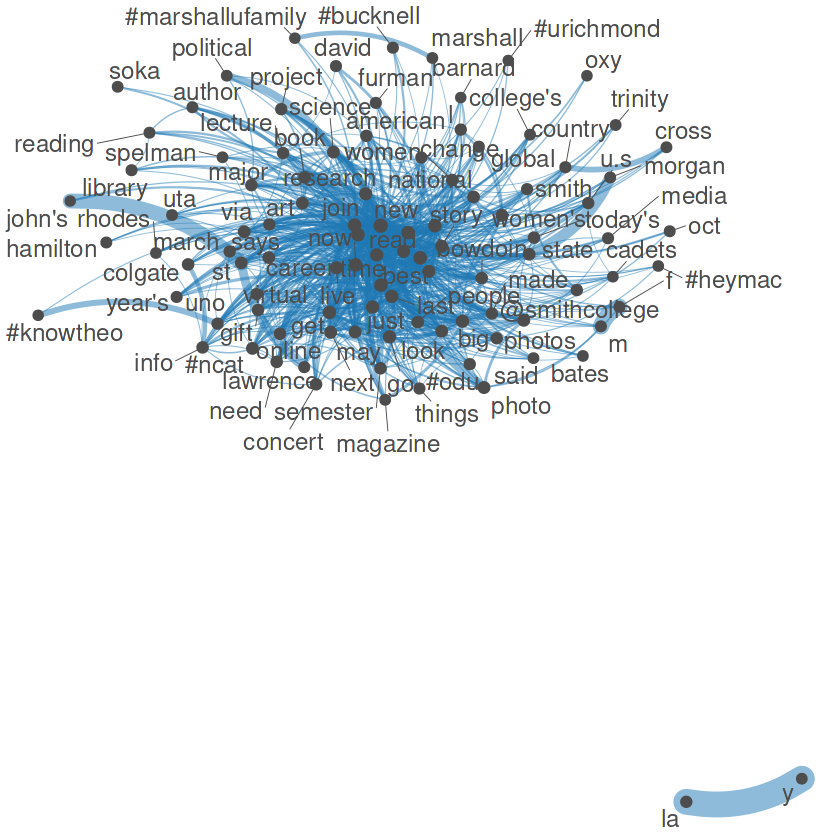

In [21]:
# for rank 301-400

toks <- tokens(hundred_4$Tweet, 
               remove_punct = TRUE, 
               remove_numbers=TRUE, 
               remove_symbols=TRUE, 
               #remove_twitter=TRUE, 
               remove_url=TRUE)

dfmat <- dfm(toks)
dfmat <- dfm_remove(dfmat, pattern = c(stopwords("en"), "http", "https", "t", "co", "bit", "ly", "thank", "thanks", "you", "amp", "campus", "RT", "pm", "p.m", "am", "a.m",
                                      "prof", "prof.", "professor", "saturday", "sunday", "monday", "tuesday", "wednesday", "thursday", "friday", "w", "w/o", "w/", "mt", "congrats", "congratulations",
                                      "hello", "bye", "welcome", "see", "check", "tomorrow", "today", "tonight", "yesterday", "class", "classes", "break", "vacation", "wish", "wishing", 
                                      "christmas", "xmas", "day", "night", "year", "month", "season", "summar", "winter", "spring", "fall", "session", "sessions", "term",
                                      "student", "students", "can", "cannot", "can't", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "zero", "ones", "zeros",
                                      "us", "they", "them", "their", "these", "those", "dr", "s", "university", "school", "college", "colleges"))
dfmat <- dfm_trim(dfmat, min_termfreq = 100)

print("Top features:")
print(topfeatures(dfmat))
print("")

print("No. of features:")
nfeat(dfmat)
print("")

fcmat <- fcm(dfmat)
print("Dimension of FCM:")
dim(fcmat)
print("")

feat <- names(topfeatures(fcmat, 100))
fcmat_select <- fcm_select(fcmat, pattern = feat, selection = "keep")

size <- log(colSums(dfm_select(dfmat, feat, selection = "keep")))
set.seed(144)
textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

fcm_plot <- textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

# save our plot
ggsave("/twitter_main_fcm_Hundred_4.png", 
       plot = fcm_plot, 
       height=10, 
       width=10, 
       units="in") 

gc()

[1] "Top features:"
      new     great      week      join       now     first       get     happy 
    28752     22357     17898     16415     15606     14847     14369     14233 
     time community 
    14185     14031 
[1] ""
[1] "No. of features:"


[1] 6645

[1] ""
[1] "Dimension of FCM:"


[1] 6645 6645

[1] ""


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,9480976,506.4,28433455,1518.6,67953774,3629.2
Vcells,182671046,1393.7,603533149,4604.6,935535493,7137.6


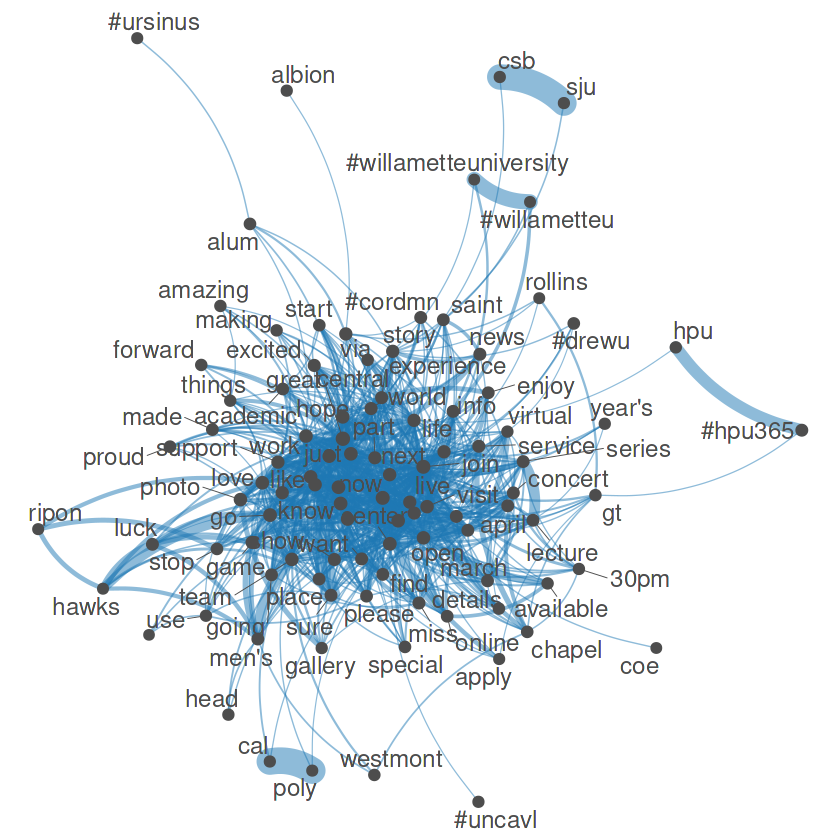

In [22]:
# for rank 401-500

toks <- tokens(hundred_5$Tweet, 
               remove_punct = TRUE, 
               remove_numbers=TRUE, 
               remove_symbols=TRUE, 
               #remove_twitter=TRUE, 
               remove_url=TRUE)

dfmat <- dfm(toks)
dfmat <- dfm_remove(dfmat, pattern = c(stopwords("en"), "http", "https", "t", "co", "bit", "ly", "thank", "thanks", "you", "amp", "campus", "RT", "pm", "p.m", "am", "a.m",
                                      "prof", "prof.", "professor", "saturday", "sunday", "monday", "tuesday", "wednesday", "thursday", "friday", "w", "w/o", "w/", "mt", "congrats", "congratulations",
                                      "hello", "bye", "welcome", "see", "check", "tomorrow", "today", "tonight", "yesterday", "class", "classes", "break", "vacation", "wish", "wishing", 
                                      "christmas", "xmas", "day", "night", "year", "month", "season", "summar", "winter", "spring", "fall", "session", "sessions", "term",
                                      "student", "students", "can", "cannot", "can't", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "zero", "ones", "zeros",
                                      "us", "they", "them", "their", "these", "those", "dr", "s", "university", "school", "college", "colleges"))
dfmat <- dfm_trim(dfmat, min_termfreq = 100)

print("Top features:")
print(topfeatures(dfmat))
print("")

print("No. of features:")
nfeat(dfmat)
print("")

fcmat <- fcm(dfmat)
print("Dimension of FCM:")
dim(fcmat)
print("")

feat <- names(topfeatures(fcmat, 100))
fcmat_select <- fcm_select(fcmat, pattern = feat, selection = "keep")

size <- log(colSums(dfm_select(dfmat, feat, selection = "keep")))
set.seed(144)
textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

fcm_plot <- textplot_network(fcmat_select, min_freq = 0.8, vertex_size = size / max(size) * 3)

# save our plot
ggsave("/twitter_main_fcm_Hundred_5.png", 
       plot = fcm_plot, 
       height=10, 
       width=10, 
       units="in") 

gc()